<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Sushant/DLS_Assignment4_Part1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import timeit
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from keras.models import Model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Allocating and Checking the GPU

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.1674734650000005
GPU (s):
0.039785835000003544
GPU speedup over CPU: 79x


### Loading the MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#Lets look at the training data
print("Training Images Shape: ",train_images.shape)
print("Training Labels: ",train_labels)


#Lets look at the testing data
print("Testing Images Shape: ",test_images.shape)
print("Testing Labels: ",test_labels)

Training Images Shape:  (60000, 28, 28)
Training Labels:  [5 0 4 ... 5 6 8]
Testing Images Shape:  (10000, 28, 28)
Testing Labels:  [7 2 1 ... 4 5 6]


### Normalizing the Images

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images/=255
test_images/=255

### Creating the Baseline Model

In [ ]:
baseline = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu', name='first_layer',kernel_initializer=keras.initializers.GlorotNormal()),
    layers.Dense(1024, activation='relu', name='second_layer',kernel_initializer=keras.initializers.GlorotNormal()),
    layers.Dense(1024, activation='relu', name='third_layer',kernel_initializer=keras.initializers.GlorotNormal()),
    layers.Dense(1024, activation='relu', name='fourth_layer',kernel_initializer=keras.initializers.GlorotNormal()),
    layers.Dense(1024, activation='relu', name="fifth_layser",kernel_initializer=keras.initializers.GlorotNormal()),
    layers.Dense(10, name='output' ,activation='softmax',kernel_initializer=keras.initializers.GlorotNormal())
])
print(baseline.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 1024)              803840    
                                                                 
 second_layer (Dense)        (None, 1024)              1049600   
                                                                 
 third_layer (Dense)         (None, 1024)              1049600   
                                                                 
 fourth_layer (Dense)        (None, 1024)              1049600   
                                                                 
 fifth_layser (Dense)        (None, 1024)              1049600   
                                                                 
 output (Dense)              (None, 10)               

In [ ]:
baseline.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
history_baseline = baseline.fit(train_images , train_labels ,epochs = 30, batch_size = 256)

Epoch 1/30
235/235 [==============================] - 2s 6ms/step - loss: 0.2322 - sparse_categorical_accuracy: 0.9290
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9736
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0611 - sparse_categorical_accuracy: 0.9818
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9856
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9890
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0.9897
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0300 - sparse_categorical_accuracy: 0.9911
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0245 - sparse_categorical_accuracy: 0.9929
Epoch 9/30
235/235 [============================

In [ ]:
evaluation = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1151 - sparse_categorical_accuracy: 0.9809


### Saving the Baseline Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_path = '/content/drive/MyDrive/DLS_Assignments/Models/assign4_part1_baseline.h5'

In [ ]:
#model_path = '/content/drive/MyDrive/DLS_Assignments/Models/assign4_part1_baseline.h5'
baseline.save(model_path)

### Loading the saved model

In [ ]:
baseline = keras.models.load_model(model_path)

### Applying SVD on weight matrices of every layer

In [ ]:
D_list = [10,20,50,100,200,784]

In [ ]:
accuracies=[]

In [ ]:
def rank_r_approx(s, U, V, r, verbose=False):
  # Compute the matrices necessary for a rank-r approximation
  #s_r, U_r, V_r = s[:r, :r], U[:, :r], V[:, :r] # ... implies any number of extra batch axes
  # Compute the low-rank approximation and its size
  S_r = tf.linalg.diag(s)
  V_rT = tf.transpose(V)
  # print("S_r")
  # print(S_r)
  # print(S_r[:r, :r])
  # print("U_r")
  # print(U)
  # print(U[:, :r])
  # print("V_rT")
  # print(V_rT)
  # print(S_r[:r, :])
  A_r = tf.matmul(tf.matmul(U[:, :r], S_r[:r, :r]), V_rT[:r, :])
  #print(S_r.shape)
  #print(U.shape)
  #print(V_rT.shape)
  #A_r = U_r@S_r@V_rT
  #A_r = tf.einsum('...s,...us,...vs->...uv',s_r,U_r,V_r)
  A_r_size = tf.size(U) + tf.size(S_r) + tf.size(V_rT)
  if verbose:
    print(f"Approximation Size: {A_r_size}")
  return A_r

#### For D=10

In [ ]:
for i in range(1,len(baseline.layers)-1):
    weights = baseline.get_layer(index=i).get_weights()[0]
    bias = baseline.get_layer(index=i).get_weights()[1]
    s, U, V = tf.linalg.svd(weights)
    weights_approx = rank_r_approx(s, U, V, 10, verbose = False)
    baseline.get_layer(index=i).set_weights([weights_approx,bias])

In [ ]:
test_10 = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.9864 - sparse_categorical_accuracy: 0.6622


In [ ]:
accuracies.append(test_10[1])

#### For D=20

In [ ]:
baseline = keras.models.load_model(model_path)

In [ ]:
for i in range(1,len(baseline.layers)-1):
    weights = baseline.get_layer(index=i).get_weights()[0]
    bias = baseline.get_layer(index=i).get_weights()[1]
    s, U, V = tf.linalg.svd(weights)
    weights_approx = rank_r_approx(s, U, V, 20, verbose = False)
    baseline.get_layer(index=i).set_weights([weights_approx,bias])

In [ ]:
test_20 = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2847 - sparse_categorical_accuracy: 0.9294


In [ ]:
accuracies.append(test_20[1])

#### For D=50

In [ ]:
baseline = keras.models.load_model(model_path)

In [ ]:
for i in range(1,len(baseline.layers)-1):
    weights = baseline.get_layer(index=i).get_weights()[0]
    bias = baseline.get_layer(index=i).get_weights()[1]
    s, U, V = tf.linalg.svd(weights)
    weights_approx = rank_r_approx(s, U, V, 50, verbose = False)
    baseline.get_layer(index=i).set_weights([weights_approx,bias])

In [ ]:
test_50 = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1284 - sparse_categorical_accuracy: 0.9775


In [ ]:
accuracies.append(test_50[1])

#### For D=100

In [ ]:
baseline = keras.models.load_model(model_path)

In [ ]:
for i in range(1,len(baseline.layers)-1):
    weights = baseline.get_layer(index=i).get_weights()[0]
    bias = baseline.get_layer(index=i).get_weights()[1]
    s, U, V = tf.linalg.svd(weights)
    weights_approx = rank_r_approx(s, U, V, 100, verbose = False)
    baseline.get_layer(index=i).set_weights([weights_approx,bias])

In [ ]:
test_100 = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1116 - sparse_categorical_accuracy: 0.9809


In [ ]:
accuracies.append(test_100[1])

#### For D=200

In [ ]:
baseline = keras.models.load_model(model_path)

In [ ]:
for i in range(1,len(baseline.layers)-1):
    weights = baseline.get_layer(index=i).get_weights()[0]
    bias = baseline.get_layer(index=i).get_weights()[1]
    s, U, V = tf.linalg.svd(weights)
    weights_approx = rank_r_approx(s, U, V, 200, verbose = False)
    baseline.get_layer(index=i).set_weights([weights_approx,bias])

In [ ]:
test_200 = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1132 - sparse_categorical_accuracy: 0.9813


In [ ]:
accuracies.append(test_200[1])

#### For D=784

In [ ]:
baseline = keras.models.load_model(model_path)

In [ ]:
for i in range(1,len(baseline.layers)-1):
    weights = baseline.get_layer(index=i).get_weights()[0]
    bias = baseline.get_layer(index=i).get_weights()[1]
    s, U, V = tf.linalg.svd(weights)
    S = tf.linalg.diag(s)
    V_T = tf.transpose(V)
    weights_approx = A_r = tf.matmul(tf.matmul(U, S), V_T)
    baseline.get_layer(index=i).set_weights([weights_approx,bias])

In [ ]:
test_full = baseline.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1151 - sparse_categorical_accuracy: 0.9809


In [ ]:
accuracies.append(test_full[1])

In [ ]:
for i in range(1,len(baseline.layers)-1):
  weights = baseline.get_layer(index=i).get_weights()[0]
  bias = baseline.get_layer(index=i).get_weights()[1]
  s, U, V = tf.linalg.svd(weights)
  S = tf.linalg.diag(s)
  V_T = tf.transpose(V)
  weights_svd = tf.matmul(tf.matmul(U, S), V_T)
  #weights_svd = U@S@V_T
  baseline.get_layer(index=i).set_weights([weights_svd,bias])

### Comparing the test accuracies for different values of D

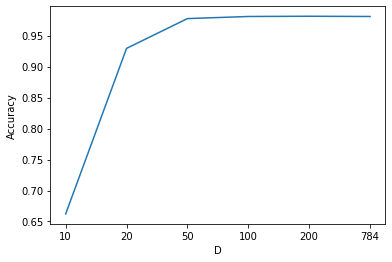

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylabel("Accuracy")
ax.set_xlabel("D")
x_axis = [0,10,20,50,100,200,784]
ax.set_xticklabels(x_axis)
plt.show()

In [ ]:
baseline.save(model_path)